# Problem Statement
**Given various features about a customer like Age, Income,
Loan Amount, Loan Intent, Home Ownership etc.. , predict if in case the loan is
given, will the customer default or not on the Loan payments.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv(r"/content/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# Checking missing values

In [4]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Text(0.5, 1.0, 'Missing Values per Feature')

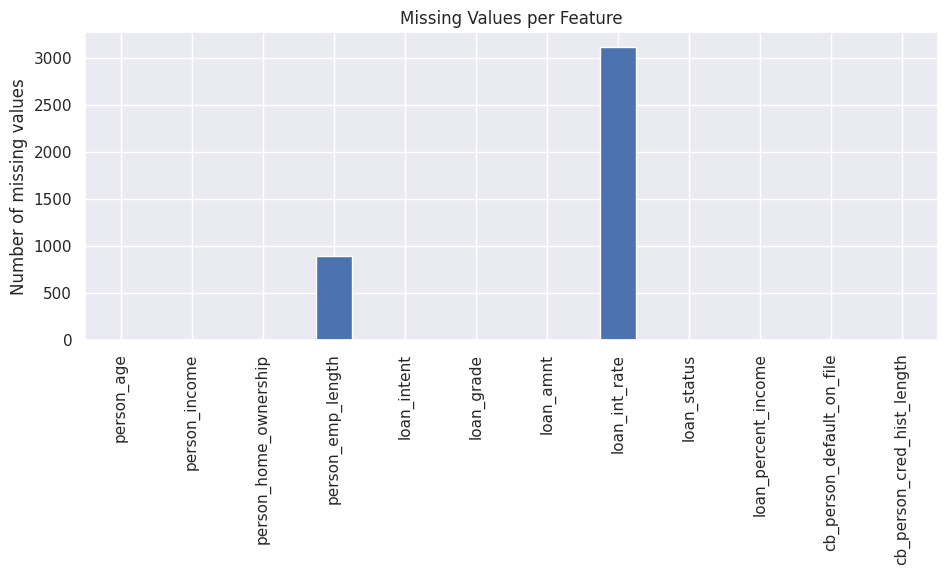

In [5]:
#the amount of missing values per feature
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(df).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing Values per Feature')

In [6]:
df[df["person_emp_length"].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [7]:
df[df["loan_int_rate"].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [8]:
df["person_emp_length"].fillna(df["person_emp_length"].mean(), inplace = True)

In [9]:
df["loan_int_rate"].fillna(df["loan_int_rate"].mean(), inplace = True)

In [10]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# Detecting an outliers
1. By boxplot
2. Z-score method
3. Scatter plot
4. IQR(Inter Quartile Range)

In [11]:
df.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2


<Axes: xlabel='cb_person_cred_hist_length'>

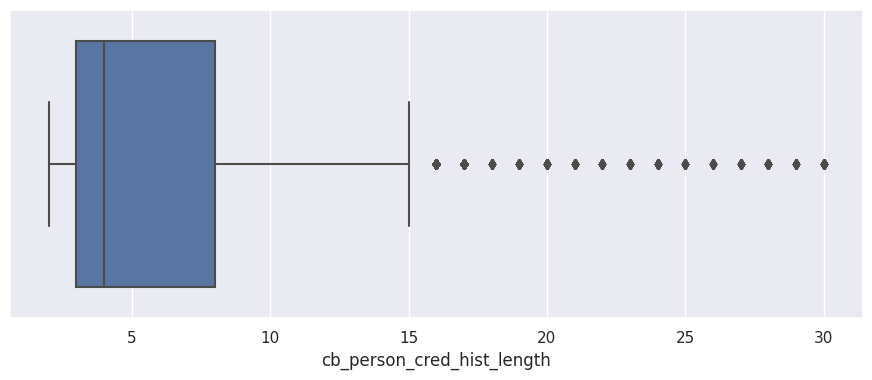

In [12]:
sns.boxplot(x = df["cb_person_cred_hist_length"])

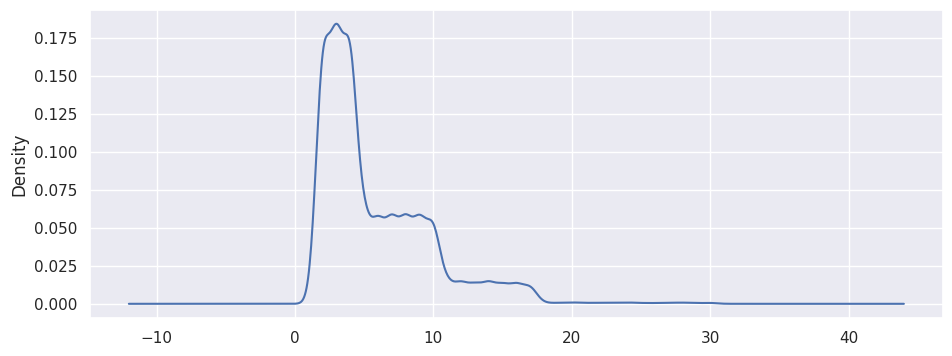

In [13]:
df['cb_person_cred_hist_length'].plot(kind='kde')
plt.show()

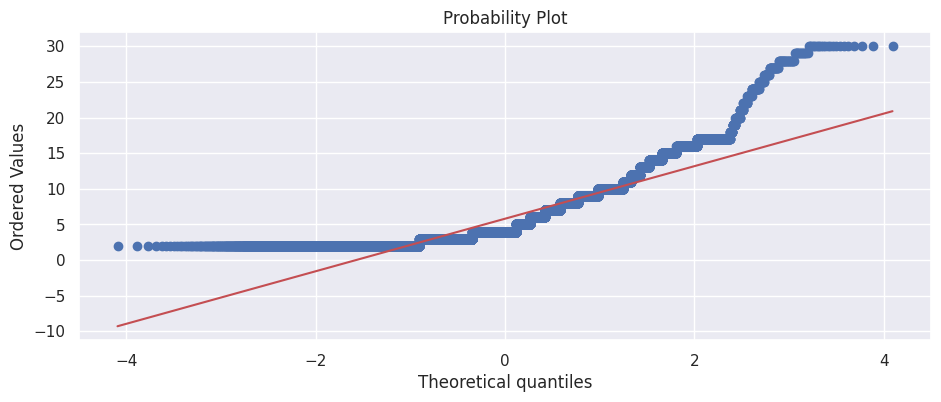

In [14]:
stats.probplot(df['cb_person_cred_hist_length'],dist='norm',plot=plt)
plt.show()

**from above QQ-plot is not normally distributed**

## Treating an outliers

In [15]:
q1 = df["cb_person_cred_hist_length"].quantile(0.25)
q3 = df["cb_person_cred_hist_length"].quantile(0.75)

IQR = q3 - q1

lower_whisker = q1-1.5*(IQR)
upper_whisker = q3+1.5*(IQR)

In [16]:
print(f"Inter Quartile Range : {IQR}")
print(f"Lower_whisker : {lower_whisker}")
print(f"Upper_whisker : {upper_whisker}")

Inter Quartile Range : 5.0
Lower_whisker : -4.5
Upper_whisker : 15.5


In [17]:
df1 = df[(df["cb_person_cred_hist_length"] > lower_whisker) & (df["cb_person_cred_hist_length"] < upper_whisker)]
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<Axes: xlabel='cb_person_cred_hist_length'>

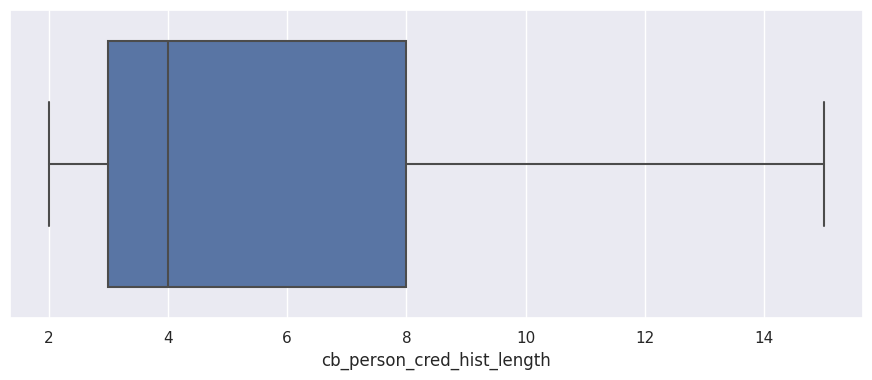

In [18]:

sns.boxplot(x = df1["cb_person_cred_hist_length"])

<Axes: xlabel='loan_percent_income'>

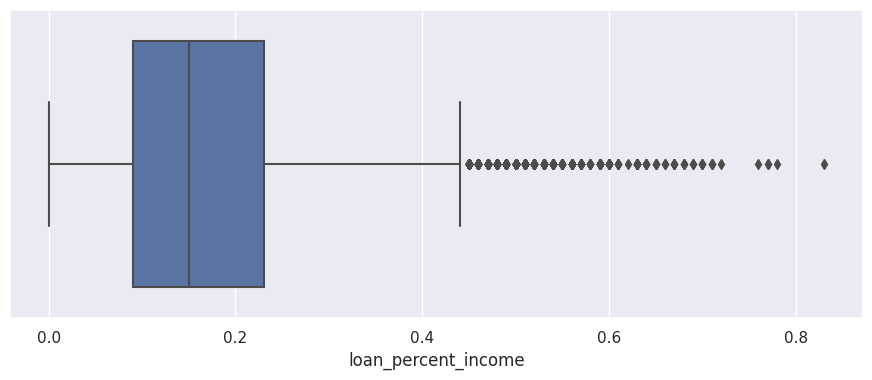

In [19]:
sns.boxplot(x = df["loan_percent_income"])

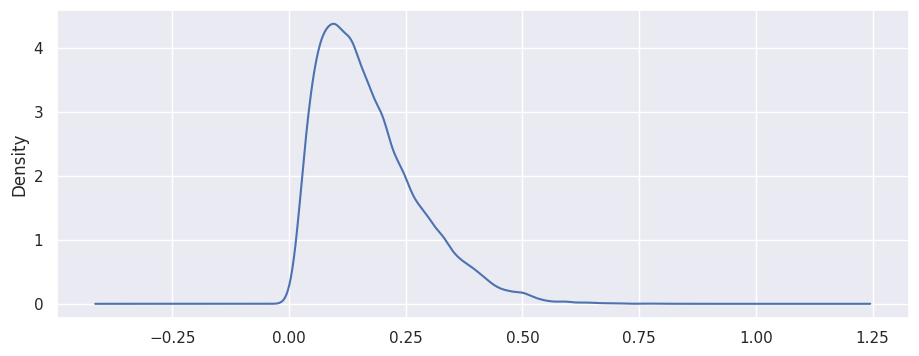

In [20]:
df1['loan_percent_income'].plot(kind='kde')
plt.show()

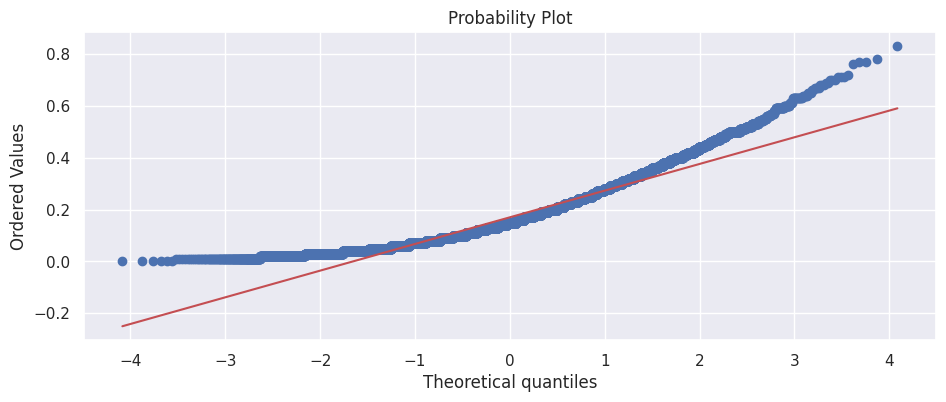

In [21]:
stats.probplot(df1['loan_percent_income'],dist='norm',plot=plt)
plt.show()

In [22]:
q1 = df1["loan_percent_income"].quantile(0.25)
q3 = df1["loan_percent_income"].quantile(0.75)

IQR = q3 - q1

lower_whisker = q1-1.5*(IQR)
upper_whisker = q3+1.5*(IQR)

In [23]:
print(f"Inter Quartile Range : {IQR}")
print(f"Lower_whisker : {lower_whisker}")
print(f"Upper_whisker : {upper_whisker}")

Inter Quartile Range : 0.14
Lower_whisker : -0.12000000000000002
Upper_whisker : 0.44000000000000006


In [24]:
df1 = df1[(df1["loan_percent_income"] > lower_whisker) & (df1["loan_percent_income"] < upper_whisker)]
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


<Axes: xlabel='loan_percent_income'>

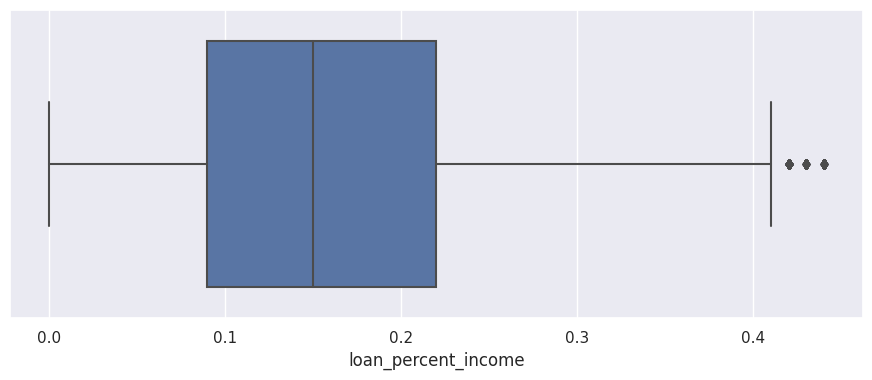

In [25]:
sns.boxplot(x = df1["loan_percent_income"])

<Axes: xlabel='loan_int_rate'>

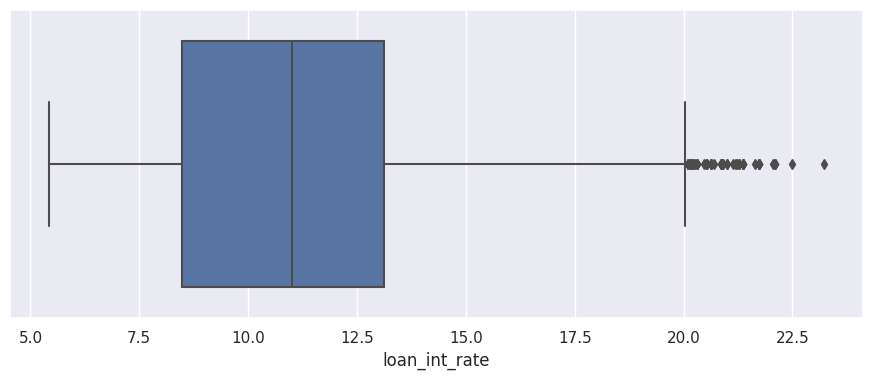

In [26]:
sns.boxplot(x = df1["loan_int_rate"])

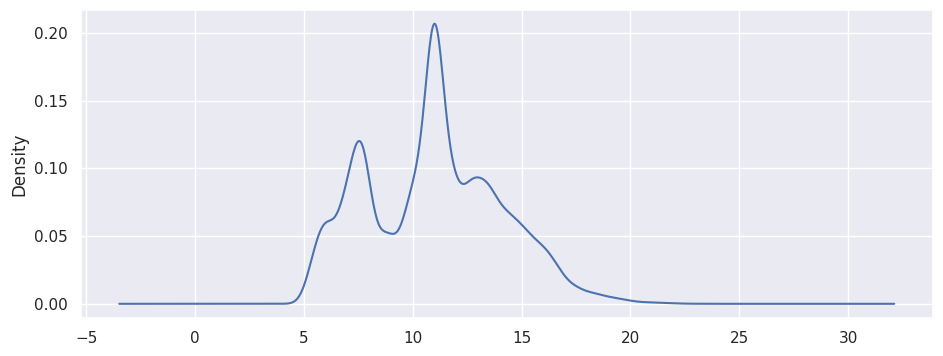

In [27]:
df1['loan_int_rate'].plot(kind='kde')
plt.show()

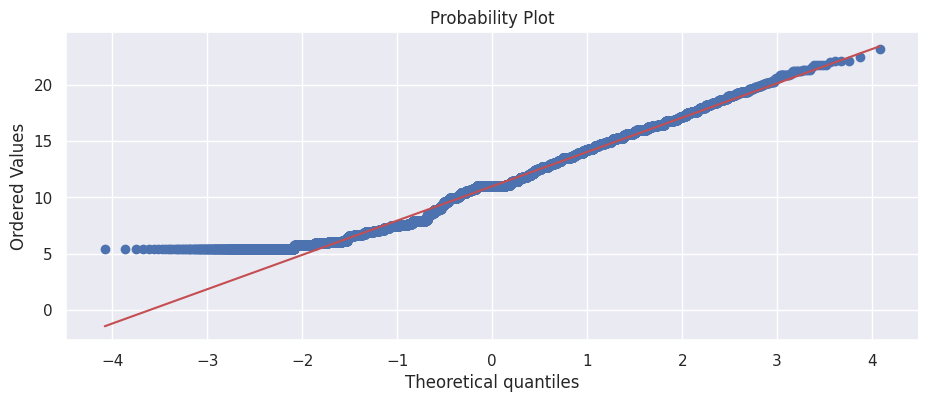

In [28]:
stats.probplot(df1['loan_int_rate'],dist='norm',plot=plt)
plt.show()

In [29]:

q1 = df1["loan_int_rate"].quantile(0.25)
q3 = df1["loan_int_rate"].quantile(0.75)

IQR = q3 - q1

lower_whisker = q1-1.5*(IQR)
upper_whisker = q3+1.5*(IQR)

In [30]:
print(f"Inter Quartile Range : {IQR}")
print(f"Lower_whisker : {lower_whisker}")
print(f"Upper_whisker : {upper_whisker}")

Inter Quartile Range : 4.619999999999999
Lower_whisker : 1.5600000000000014
Upper_whisker : 20.04


In [31]:
df1 = df1[(df1["loan_int_rate"] > lower_whisker) & (df1["loan_int_rate"] < upper_whisker)]
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


<Axes: xlabel='loan_int_rate'>

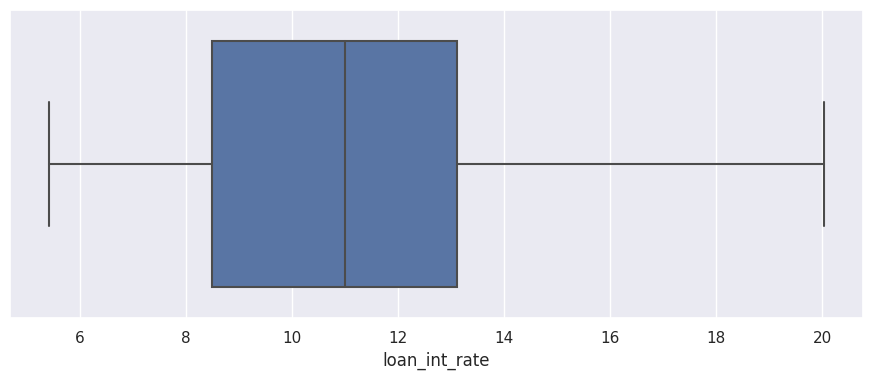

In [32]:
sns.boxplot(x = df1["loan_int_rate"])

In [33]:
df1.shape

(30741, 12)

<Axes: xlabel='loan_amnt'>

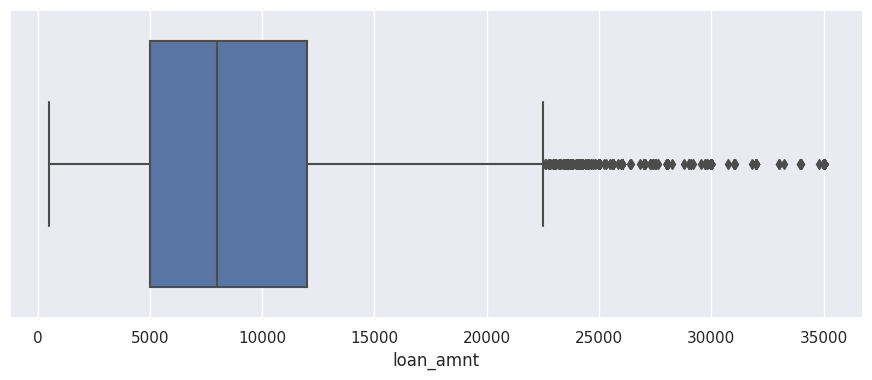

In [34]:
sns.boxplot(x = df1["loan_amnt"])

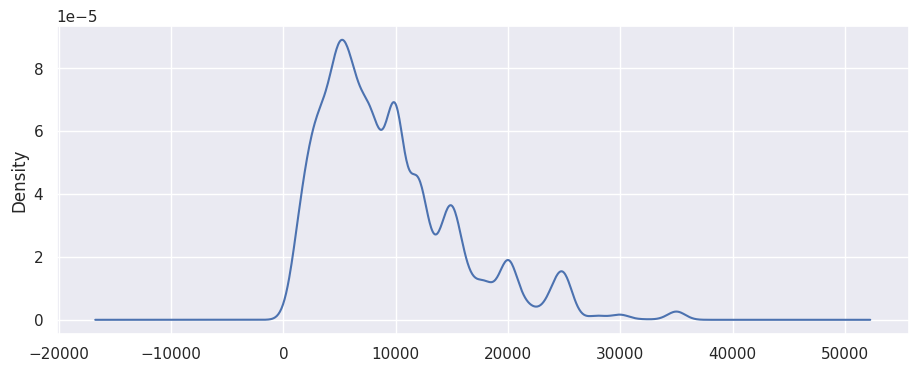

In [35]:
df1['loan_amnt'].plot(kind='kde')
plt.show()

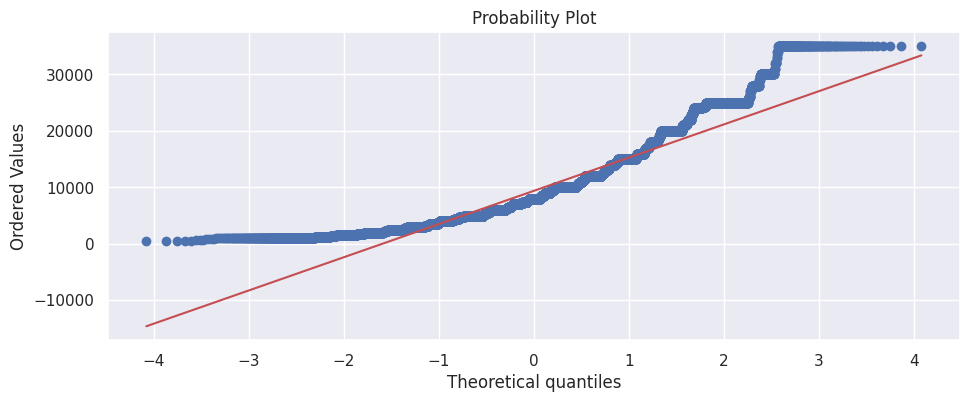

In [36]:
stats.probplot(df1['loan_amnt'],dist='norm',plot=plt)
plt.show()

In [37]:
q1 = df1["loan_amnt"].quantile(0.25)
q3 = df1["loan_amnt"].quantile(0.75)

IQR = q3 - q1

lower_whisker = q1-1.5*(IQR)
upper_whisker = q3+1.5*(IQR)

In [38]:
print(f"Inter Quartile Range : {IQR}")
print(f"Lower_whisker : {lower_whisker}")
print(f"Upper_whisker : {upper_whisker}")

Inter Quartile Range : 7000.0
Lower_whisker : -5500.0
Upper_whisker : 22500.0


In [39]:
df1 = df1[(df1["loan_amnt"] > lower_whisker) & (df1["loan_amnt"] < upper_whisker)]
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3


<Axes: xlabel='loan_amnt'>

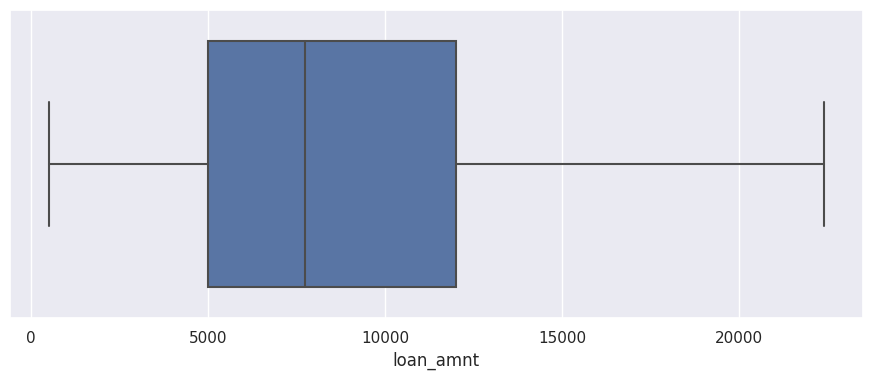

In [40]:
sns.boxplot(x = df1["loan_amnt"])

<Axes: xlabel='person_emp_length'>

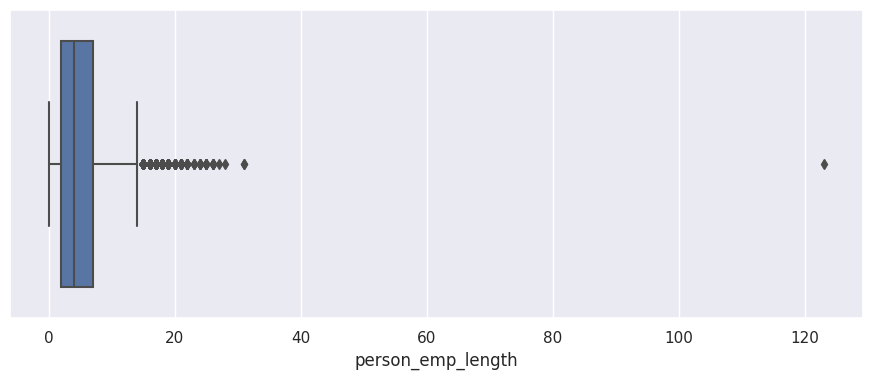

In [41]:
sns.boxplot(x = df1["person_emp_length"])

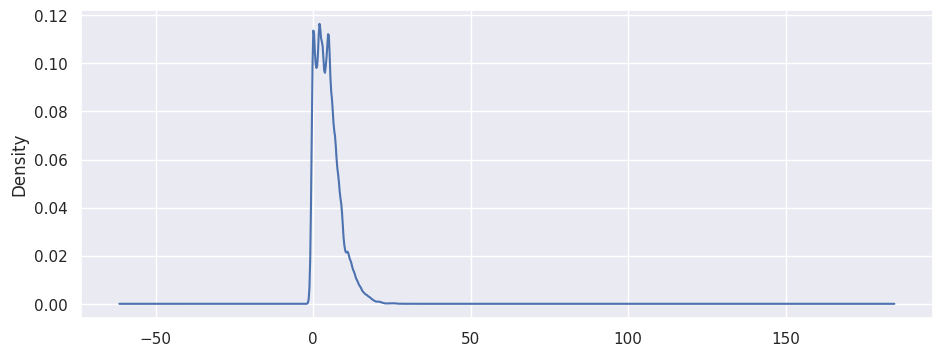

In [42]:
df1['person_emp_length'].plot(kind='kde')
plt.show()

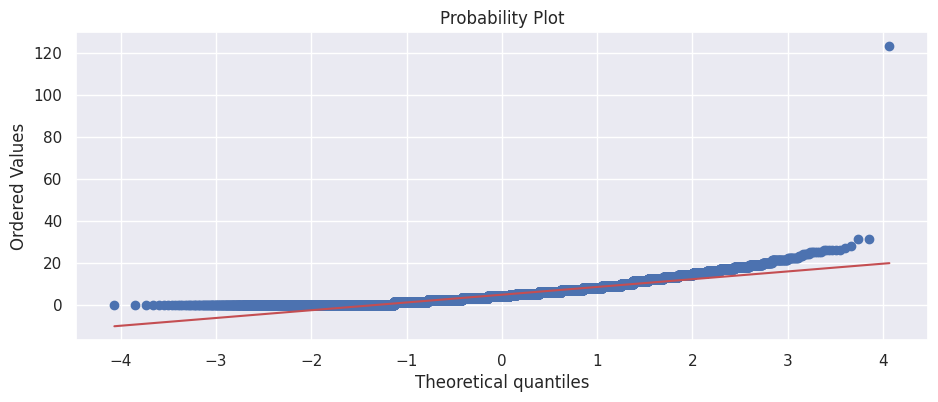

In [43]:
stats.probplot(df1['person_emp_length'],dist='norm',plot=plt)
plt.show()

In [44]:
q1 = df1["person_emp_length"].quantile(0.25)
q3 = df1["person_emp_length"].quantile(0.75)

IQR = q3 - q1

lower_whisker = q1-1.5*(IQR)
upper_whisker = q3+1.5*(IQR)

In [45]:
print(f"Inter Quartile Range : {IQR}")
print(f"Lower_whisker : {lower_whisker}")
print(f"Upper_whisker : {upper_whisker}")

Inter Quartile Range : 5.0
Lower_whisker : -5.5
Upper_whisker : 14.5


In [46]:
df1 = df1[(df1["person_emp_length"] > lower_whisker) & (df1["person_emp_length"] < upper_whisker)]
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3


<Axes: xlabel='person_emp_length'>

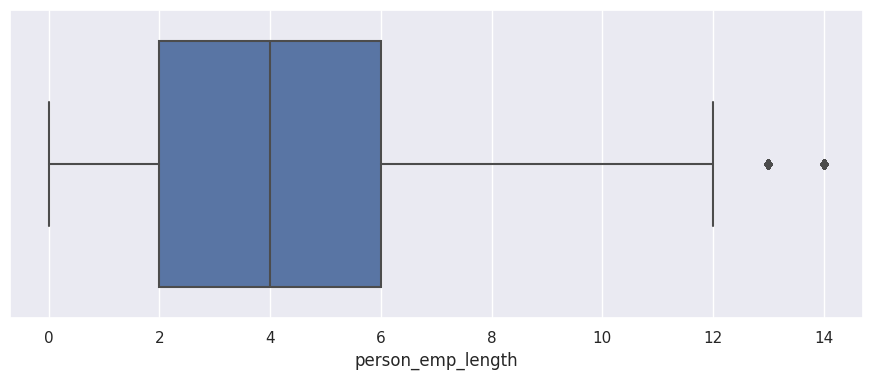

In [47]:
sns.boxplot(x = df1["person_emp_length"])

<Axes: xlabel='person_income'>

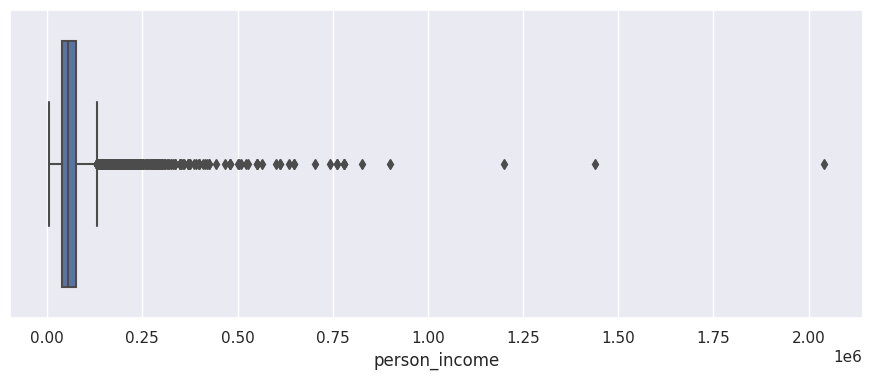

In [48]:
sns.boxplot(x = df1["person_income"])

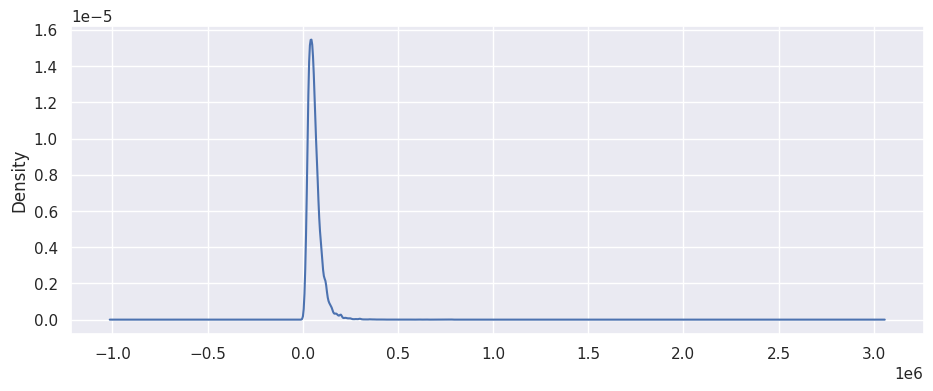

In [49]:
df1['person_income'].plot(kind='kde')
plt.show()

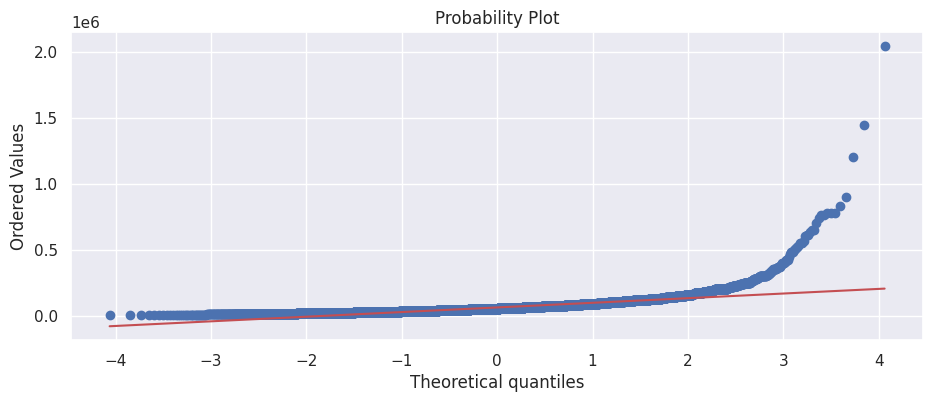

In [50]:
stats.probplot(df1['person_income'],dist='norm',plot=plt)
plt.show()

In [51]:

q1 = df1["person_income"].quantile(0.25)
q3 = df1["person_income"].quantile(0.75)

IQR = q3 - q1

lower_whisker = q1-1.5*(IQR)
upper_whisker = q3+1.5*(IQR)

In [52]:
print(f"Inter Quartile Range : {IQR}")
print(f"Lower_whisker : {lower_whisker}")
print(f"Upper_whisker : {upper_whisker}")

Inter Quartile Range : 37000.0
Lower_whisker : -17500.0
Upper_whisker : 130500.0


In [53]:
df1 = df1[(df1["person_income"] > lower_whisker) & (df1["person_income"] < upper_whisker)]
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3


<Axes: xlabel='person_income'>

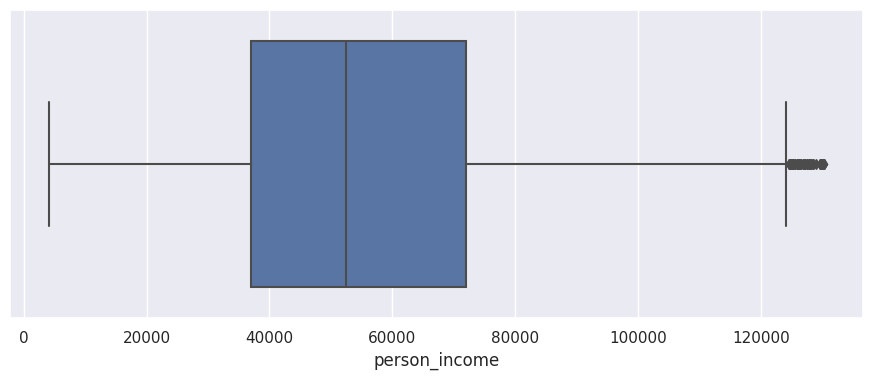

In [54]:
sns.boxplot(x = df1["person_income"])

<Axes: xlabel='person_age'>

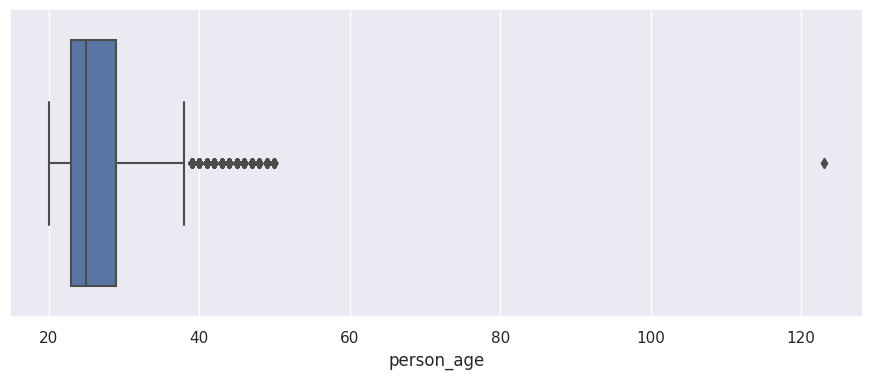

In [55]:
sns.boxplot(x = df1["person_age"])

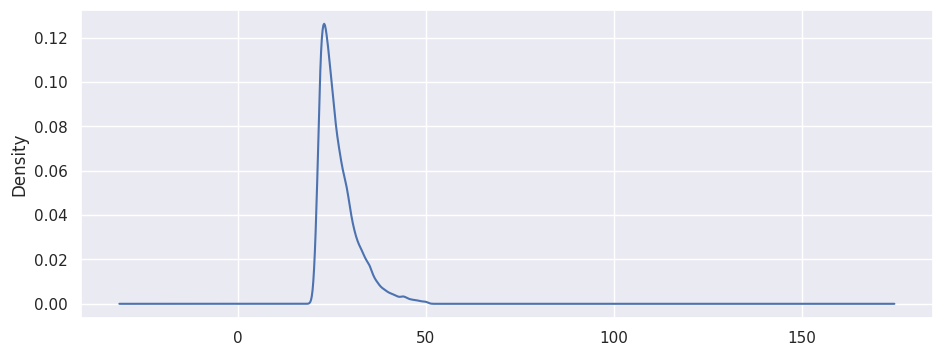

In [56]:
df1['person_age'].plot(kind='kde')
plt.show()

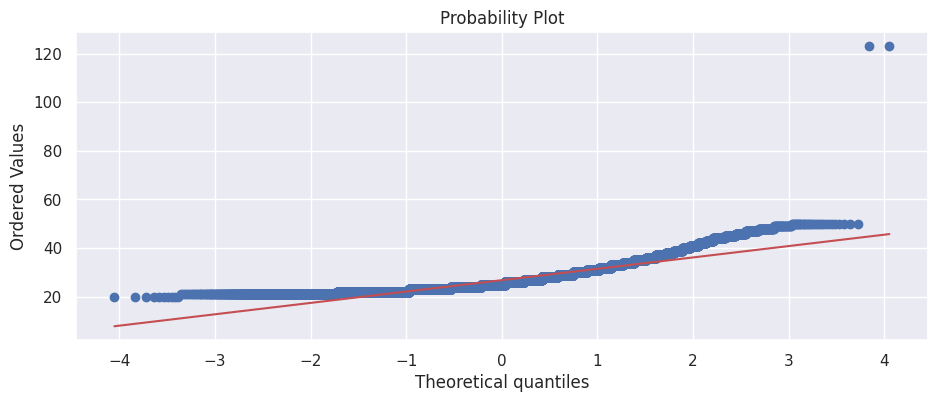

In [57]:
stats.probplot(df1['person_age'],dist='norm',plot=plt)
plt.show()

In [58]:
q1 = df1["person_age"].quantile(0.25)
q3 = df1["person_age"].quantile(0.75)

IQR = q3 - q1

lower_whisker = q1-1.5*(IQR)
upper_whisker = q3+1.5*(IQR)

In [59]:
print(f"Inter Quartile Range : {IQR}")
print(f"Lower_whisker : {lower_whisker}")
print(f"Upper_whisker : {upper_whisker}")

Inter Quartile Range : 6.0
Lower_whisker : 14.0
Upper_whisker : 38.0


In [60]:
df1 = df1[(df1["person_age"] > lower_whisker) & (df1["person_age"] < upper_whisker)]
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3


<Axes: xlabel='person_age'>

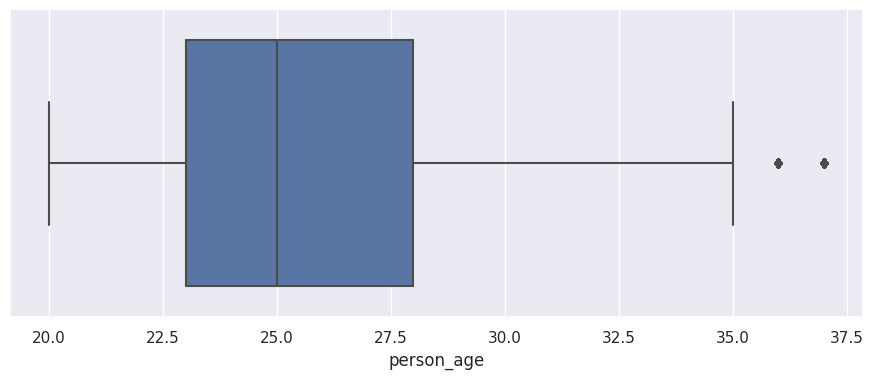

In [61]:
sns.boxplot(x = df1["person_age"])

In [62]:
df1.shape

(26163, 12)

# Univariant Analysis

<Axes: xlabel='person_age', ylabel='Count'>

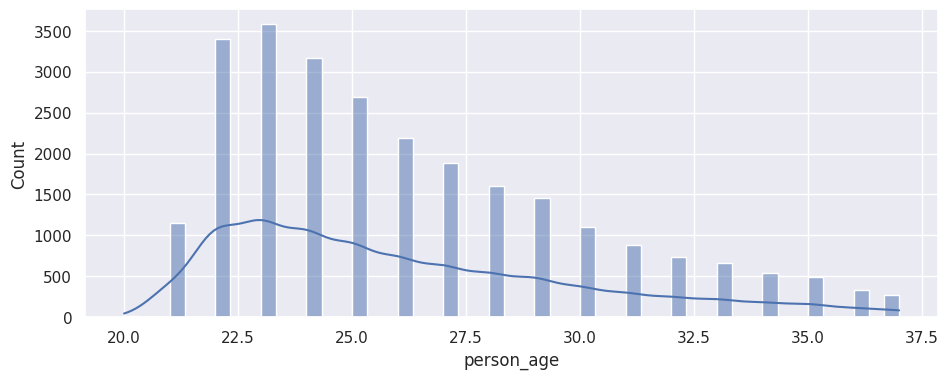

In [63]:
sns.histplot(x = df1["person_age"], kde = True)

**the person age's are right skewness, most of the data points are located at right side**

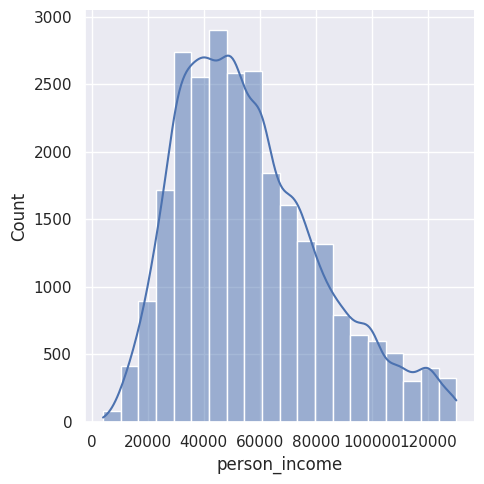

In [64]:
sns.displot(df1["person_income"],kind="hist", bins = 20, kde = True)

**mostly person income's are normally distributed**

In [65]:
df1["person_home_ownership"].unique()

array(['OWN', 'MORTGAGE', 'OTHER', 'RENT'], dtype=object)

<Axes: xlabel='person_home_ownership', ylabel='count'>

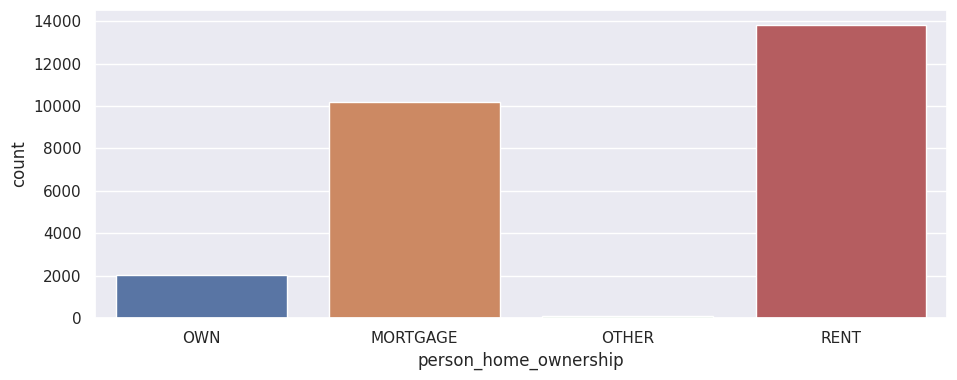

In [66]:
sns.countplot(x = df1["person_home_ownership"])

**According to my data set, the count of rentals are higher than other categories**

<Axes: xlabel='count', ylabel='loan_intent'>

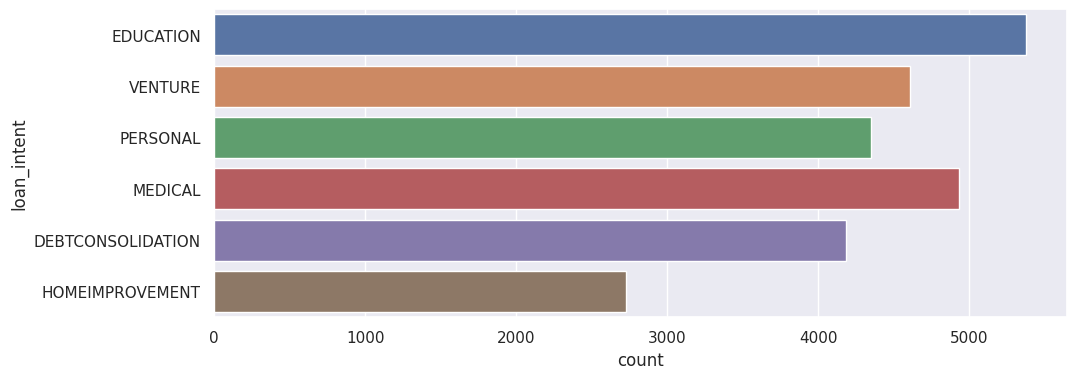

In [67]:
sns.countplot(y = df1["loan_intent"])

**From the above plot, we can observe that the loan intent is very high for education**

<Axes: xlabel='person_income', ylabel='Density'>

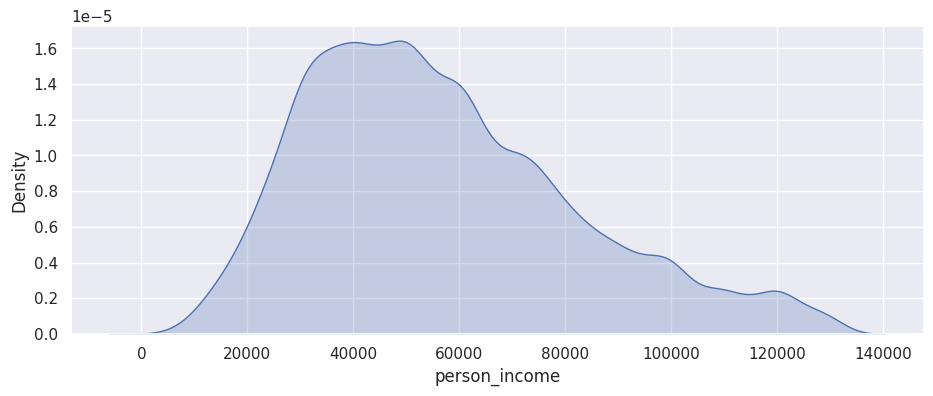

In [68]:
sns.kdeplot(x = df1["person_income"], fill = bool)

**the person income's are slightly normal distributed**

In [69]:
df1["loan_grade"].unique()

array(['B', 'A', 'D', 'E', 'C', 'F', 'G'], dtype=object)

<Axes: xlabel='loan_grade', ylabel='count'>

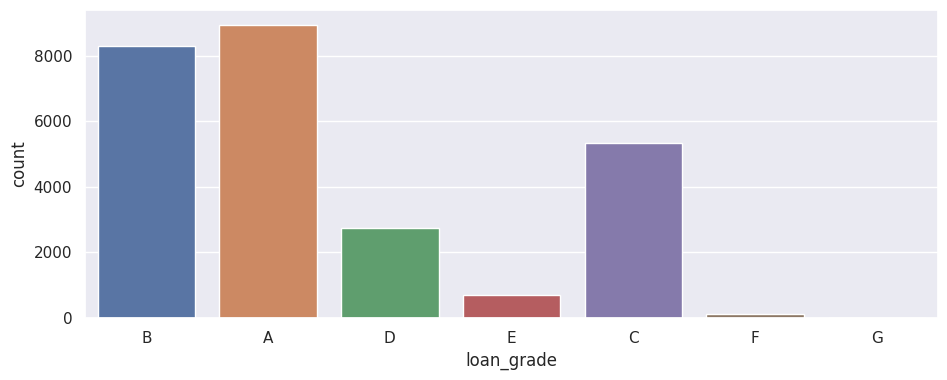

In [70]:
sns.countplot(x = df1["loan_grade"])

**The loan grade of "A" is highly counted when compare to other's**

<Axes: xlabel='loan_amnt', ylabel='Count'>

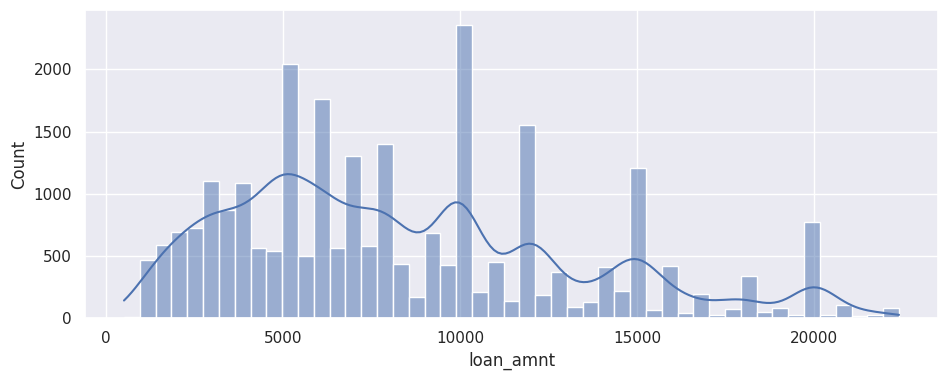

In [71]:
sns.histplot(x = df1["loan_amnt"], kde = True)

<Axes: xlabel='loan_status', ylabel='count'>

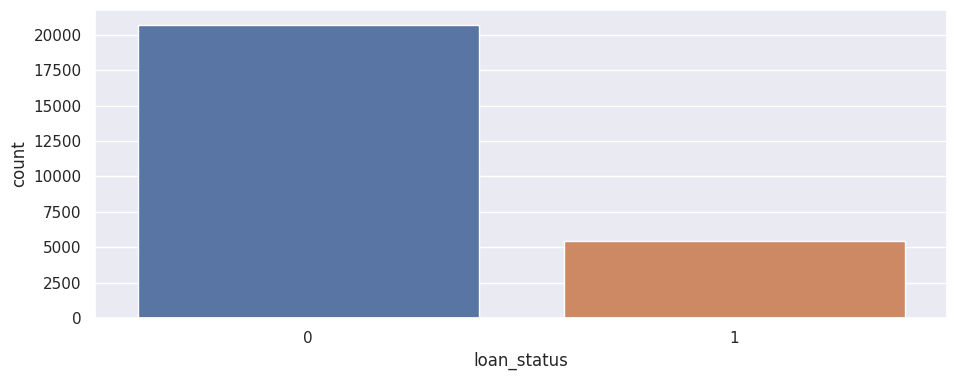

In [72]:
sns.countplot(x = df1["loan_status"])

# Bivariant Analysis

In [73]:
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3


<Axes: xlabel='person_home_ownership', ylabel='person_age'>

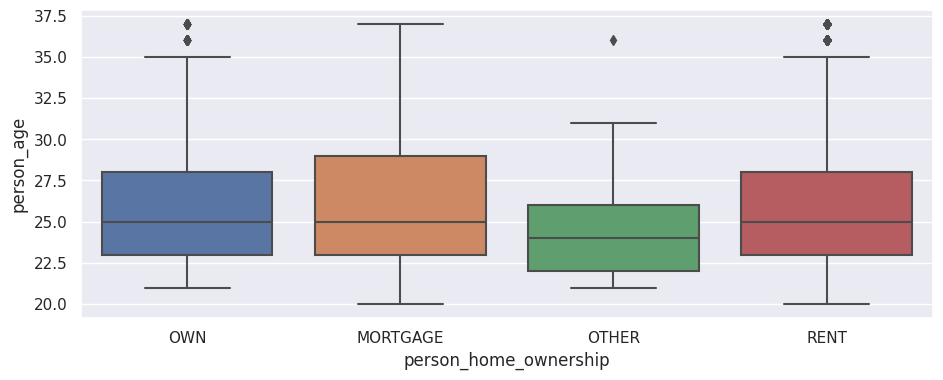

In [74]:
sns.boxplot(y = df1["person_age"], x = df1["person_home_ownership"])

**Most of the customers are staying at mortage and less at other type of home**

<Axes: xlabel='loan_status', ylabel='loan_intent'>

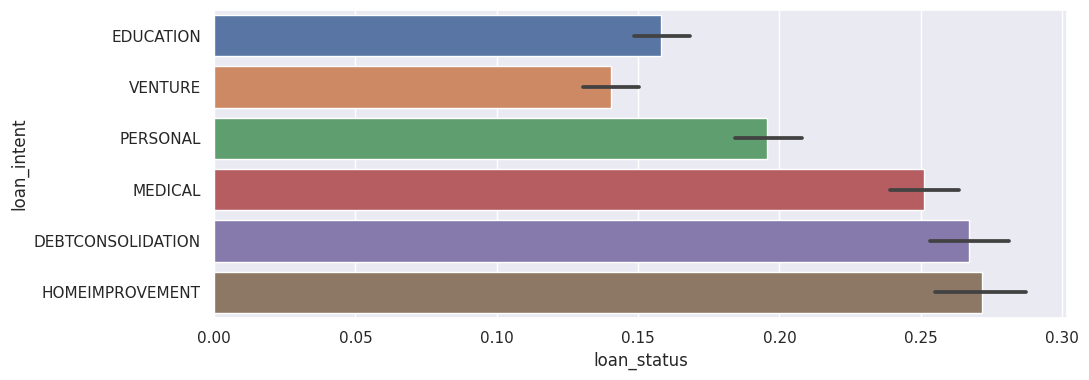

In [75]:
sns.barplot(x = df1["loan_status"], y = df1["loan_intent"])

**Mostly the loan is approved for Home improvement**

<Axes: xlabel='person_income', ylabel='person_age'>

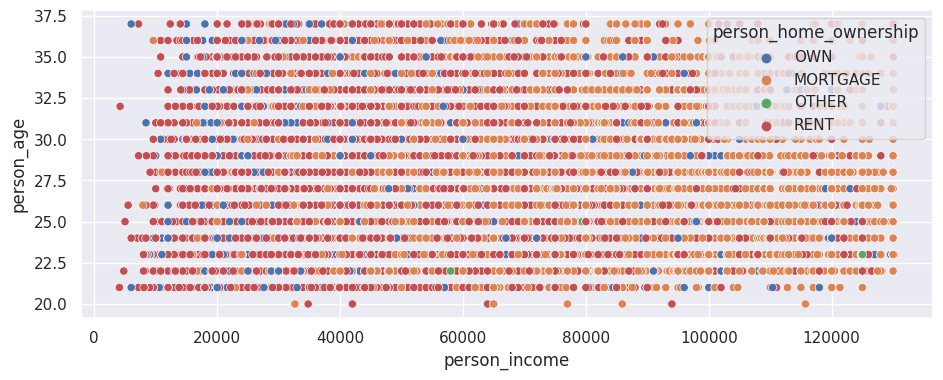

In [129]:
sns.scatterplot(y = df1["person_age"], x = df1["person_income"], hue = df1["person_home_ownership"])

<Axes: xlabel='loan_amnt', ylabel='person_income'>

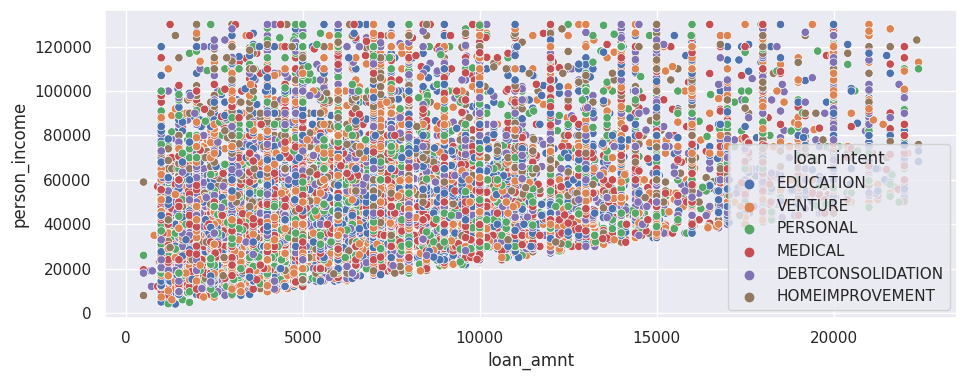

In [130]:
sns.scatterplot(x = df1["loan_amnt"], y = df1["person_income"], hue = df1["loan_intent"])

<ipython-input-78-606495b16e56>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=df1,x="loan_grade",y="loan_status",kind="bar",ci=None)


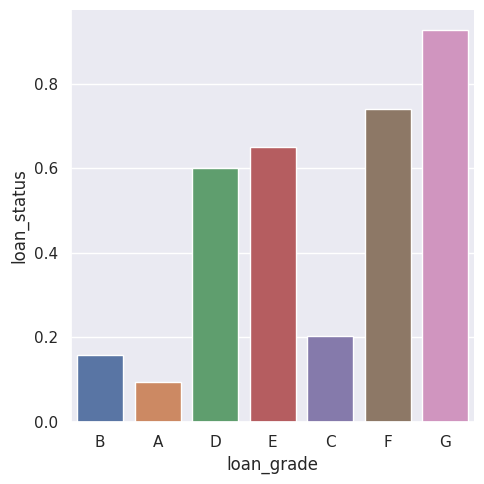

In [78]:
sns.catplot(data=df1,x="loan_grade",y="loan_status",kind="bar",ci=None)

**The most of the people's are applied for grade "G**

<Axes: xlabel='loan_status'>

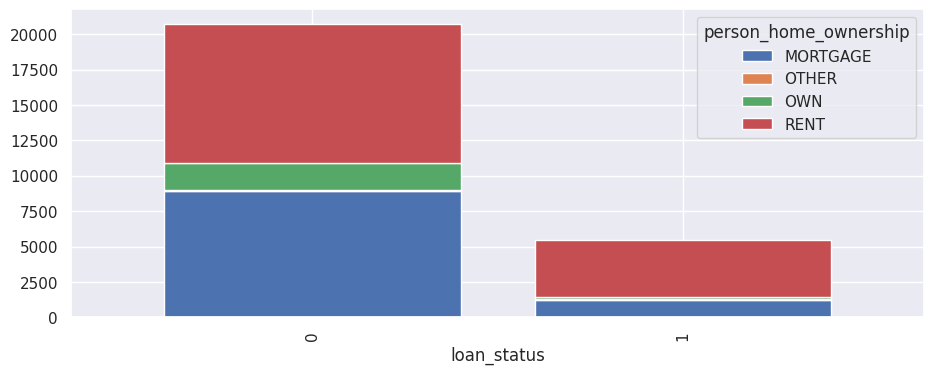

In [79]:
pd.crosstab(df1["loan_status"],df1["person_home_ownership"]).plot(kind="bar",width=0.8,stacked=True)

<Axes: xlabel='loan_status'>

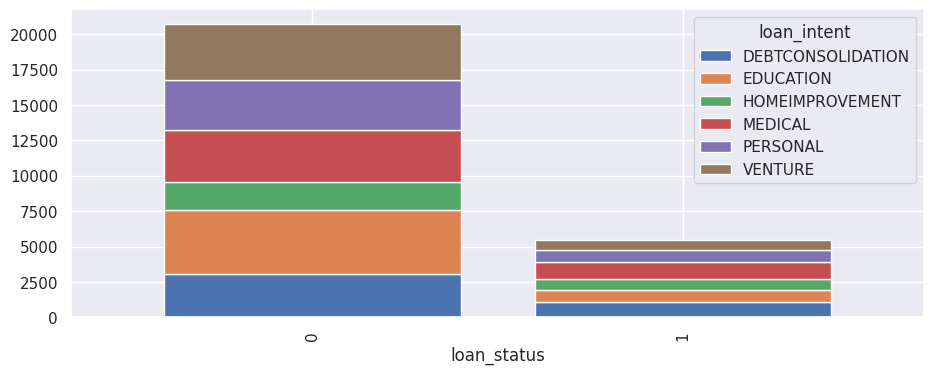

In [80]:
pd.crosstab(df1["loan_status"],df1["loan_intent"]).plot(kind="bar",width=0.8,stacked=True)

**Education category high in loan_status in non-default**

<Axes: xlabel='loan_status'>

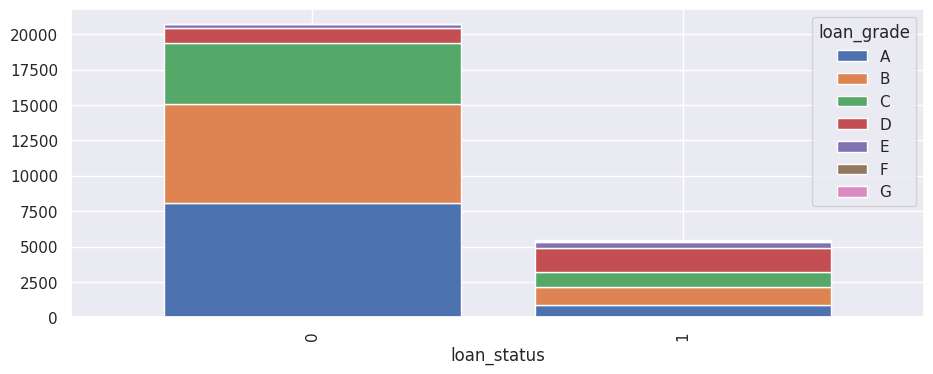

In [81]:
pd.crosstab(df1["loan_status"],df1["loan_grade"]).plot(kind="bar",width=0.8,stacked=True)

**from the above plot most of the grades are "A" & "B" only.**

<Axes: xlabel='loan_status'>

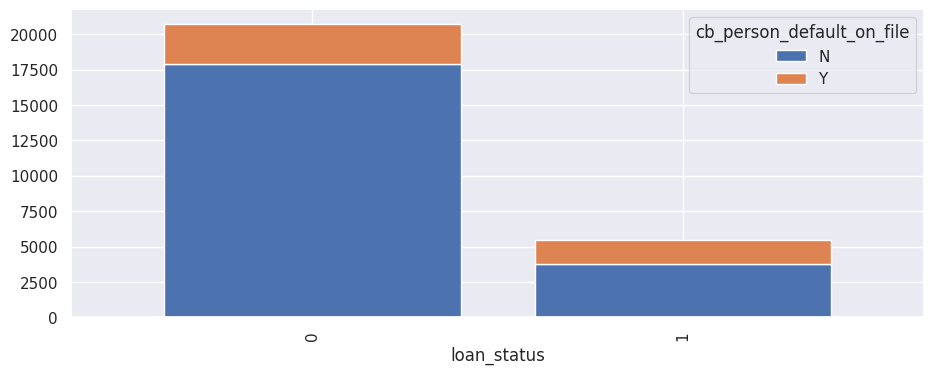

In [82]:
pd.crosstab(df1["loan_status"],df1["cb_person_default_on_file"]).plot(kind="bar",width=0.8,stacked=True)

<ipython-input-83-1ac7c25eb4ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="Set3",linecolor="black",linewidth=4)


<Axes: >

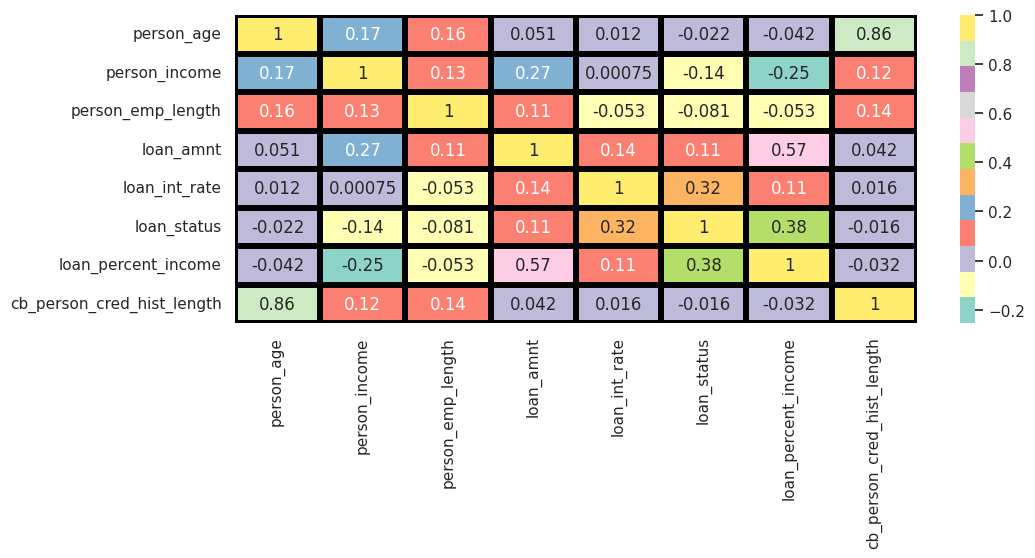

In [83]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap="Set3",linecolor="black",linewidth=4)

1. As person age increases person credit history length will be increased, it means it is highly positive correlation.
2. There is a moderate positive correlation between loan_percent_income to loan_status.

# Machine Learning Model

In [84]:
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.29,0,0.14,N,3


In [85]:
df1.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [86]:
y = df1["loan_status"]
X = df1[["person_age",	"person_income",	"person_home_ownership",	"person_emp_length",	"loan_intent",	"loan_grade",	"loan_amnt",	"loan_int_rate", "loan_percent_income",	"cb_person_default_on_file",	"cb_person_cred_hist_length"]]

In [87]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [88]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(19622, 11) (19622,)
(6541, 11) (6541,)


# Separating Categorical and Numerical Columns

In [89]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
20223,33,48000,RENT,0.0,MEDICAL,C,4000,14.650000,0.08,N,5
13628,24,58155,RENT,8.0,HOMEIMPROVEMENT,E,12950,11.011695,0.22,N,4
11274,24,72800,MORTGAGE,0.0,HOMEIMPROVEMENT,B,2300,10.620000,0.03,N,4
17719,25,35000,RENT,4.0,VENTURE,A,4000,7.510000,0.11,N,4
5428,25,55000,RENT,3.0,DEBTCONSOLIDATION,C,5000,11.011695,0.09,Y,4


In [90]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

## Separating Numerical Columns

In [91]:
X_train_num = X_train.select_dtypes(exclude=['object'])

X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
20223,33,48000,0.0,4000,14.650000,0.08,5
13628,24,58155,8.0,12950,11.011695,0.22,4
11274,24,72800,0.0,2300,10.620000,0.03,4
17719,25,35000,4.0,4000,7.510000,0.11,4
5428,25,55000,3.0,5000,11.011695,0.09,4


In [92]:
#scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# column names are lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                    columns = X_train_num.columns,
                                    index = X_train_num.index)

In [93]:
X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
20223,1.767273,-0.339319,-1.317354,-0.908745,1.243682,-0.897544,0.055173
13628,-0.550909,0.059141,1.099771,0.947718,0.034561,0.608641,-0.304734
11274,-0.550909,0.633779,-1.317354,-1.261369,-0.095611,-1.435468,-0.304734
17719,-0.293333,-0.849411,-0.108792,-0.908745,-1.129160,-0.574790,-0.304734
5428,-0.293333,-0.064654,-0.410932,-0.701319,0.034561,-0.789959,-0.304734


In [94]:
print("Number of numerical Features:",scaler.n_features_in_)

print("Mean of colummn : ", scaler.mean_)
print("STD of each columns : ", np.sqrt(scaler.var_))

Number of numerical Features: 7
Mean of colummn :  [2.61388238e+01 5.66477590e+04 4.36006931e+00 8.38105570e+03
 1.09076988e+01 1.63426766e-01 4.84670268e+00]
STD of each columns :  [3.88235310e+00 2.54856188e+04 3.30971795e+00 4.82099679e+03
 3.00905107e+00 9.29500389e-02 2.77849835e+00]


In [95]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
20223,RENT,MEDICAL,C,N
13628,RENT,HOMEIMPROVEMENT,E,N
11274,MORTGAGE,HOMEIMPROVEMENT,B,N
17719,RENT,VENTURE,A,N
5428,RENT,DEBTCONSOLIDATION,C,Y


In [96]:
X_train_cat_o=X_train_cat[['person_home_ownership','loan_intent','cb_person_default_on_file']]
X_train_cat_o.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
20223,RENT,MEDICAL,N
13628,RENT,HOMEIMPROVEMENT,N
11274,MORTGAGE,HOMEIMPROVEMENT,N
17719,RENT,VENTURE,N
5428,RENT,DEBTCONSOLIDATION,Y


## Applying OneHotEncoding

In [97]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder
encoder_ = OneHotEncoder(drop='first', sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat_o),
                               columns=encoder_.get_feature_names_out(X_train_cat_o.columns),
                               index = X_train_cat_o.index)

X_train_cat_ohe.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
20223,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
13628,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
11274,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17719,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5428,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Applying Label Encoding on loan_grade Categorical Columns

In [98]:
X_train_cat_1=X_train_cat["loan_grade"]
X_train_cat_1.head()

20223    C
13628    E
11274    B
17719    A
5428     C
Name: loan_grade, dtype: object

In [99]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
20223
13628
11274
17719
5428


In [100]:
X_train_cat_1.unique()

array(['C', 'E', 'B', 'A', 'D', 'F', 'G'], dtype=object)

In [101]:
grade_encoder = {'A':7 ,'B': 6 ,'C':5 ,'D' : 4,'E' : 3 , 'F' :2, 'G' :1}
X_train_cat_le['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : grade_encoder[x])


In [102]:
X_train_cat_le.head()

,loan_grade
20223,5
13628,3
11274,6
17719,7
5428,5


## Concatinating the OneHotEncoder and Label Feature of Catageroy

In [103]:
X_train_cat_transformed = pd.concat([X_train_cat_ohe,X_train_cat_le],axis=1)

In [104]:
X_train_cat_transformed.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
20223,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5
13628,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3
11274,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6
17719,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7
5428,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5


## Concatinating the numerical and categorical columns

In [105]:
X_train_transformed = pd.concat([X_train_cat_transformed,X_train_num_rescaled],axis=1)

In [106]:
X_train_transformed.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
20223,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5,1.767273,-0.339319,-1.317354,-0.908745,1.243682,-0.897544,0.055173
13628,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3,-0.550909,0.059141,1.099771,0.947718,0.034561,0.608641,-0.304734
11274,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6,-0.550909,0.633779,-1.317354,-1.261369,-0.095611,-1.435468,-0.304734
17719,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7,-0.293333,-0.849411,-0.108792,-0.908745,-1.129160,-0.574790,-0.304734
5428,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5,-0.293333,-0.064654,-0.410932,-0.701319,0.034561,-0.789959,-0.304734


# Data perparation on Test Data

In [107]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6541 entries, 10315 to 24617
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  6541 non-null   int64  
 1   person_income               6541 non-null   int64  
 2   person_home_ownership       6541 non-null   object 
 3   person_emp_length           6541 non-null   float64
 4   loan_intent                 6541 non-null   object 
 5   loan_grade                  6541 non-null   object 
 6   loan_amnt                   6541 non-null   int64  
 7   loan_int_rate               6541 non-null   float64
 8   loan_percent_income         6541 non-null   float64
 9   cb_person_default_on_file   6541 non-null   object 
 10  cb_person_cred_hist_length  6541 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 613.2+ KB


## Separating Categorical and numerical columns

### separating categorical columns

In [108]:
X_test_cat=X_test.select_dtypes(include=['object'])

In [109]:
X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
10315,MORTGAGE,EDUCATION,C,N
28587,MORTGAGE,MEDICAL,A,N
20380,RENT,DEBTCONSOLIDATION,A,N
12292,RENT,EDUCATION,A,N
8052,RENT,PERSONAL,C,Y


## Separating the numerical columns

In [110]:
X_test_num = X_test.select_dtypes(exclude=["object"])

In [111]:
X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
10315,26,66504,10.000000,12000,12.53,0.18,3
28587,29,105000,13.000000,12000,7.88,0.11,10
20380,35,39000,8.000000,4500,6.62,0.12,6
12292,25,36000,4.789686,12000,5.79,0.33,3
8052,23,48000,7.000000,7200,14.27,0.15,3


In [112]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                    columns = X_test_num.columns,
                                    index = X_test_num.index)

X_test_num_rescaled.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
10315,-0.035758,0.386737,1.704052,0.750663,0.539140,0.178303,-0.664641
28587,0.736970,1.897236,2.610473,0.750663,-1.006197,-0.574790,1.854706
20380,2.282424,-0.692460,1.099771,-0.805032,-1.424934,-0.467205,0.415079
12292,-0.293333,-0.810173,0.129805,0.750663,-1.700768,1.792073,-0.664641
8052,-0.808485,-0.339319,0.797630,-0.244982,1.117396,-0.144451,-0.664641


## Applying the OneEncoder on nomial Categorical columns

In [113]:
X_test_cat_o=X_test_cat[['person_home_ownership','loan_intent','cb_person_default_on_file']]

In [114]:
X_test_cat_o.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
10315,MORTGAGE,EDUCATION,N
28587,MORTGAGE,MEDICAL,N
20380,RENT,DEBTCONSOLIDATION,N
12292,RENT,EDUCATION,N
8052,RENT,PERSONAL,Y


In [115]:
X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat_o),
                             columns = encoder_.get_feature_names_out(X_test_cat_o.columns),
                             index = X_test_cat_o.index)

In [116]:
X_test_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
10315,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28587,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20380,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12292,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8052,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


## Applying the LabelEncoder on ordinal Categorical columns

In [117]:
X_test_cat_le = pd.DataFrame(index=X_test_cat.index)

In [118]:
X_test_cat_le.head()

""
10315
28587
20380
12292
8052


In [119]:
X_test_cat['loan_grade'].unique()

array(['C', 'A', 'B', 'D', 'E', 'F', 'G'], dtype=object)

In [120]:
X_test_cat_le['loan_grade'] = X_test_cat["loan_grade"].apply(lambda x : grade_encoder[x])
X_test_cat_le.head()

,loan_grade
10315,5
28587,7
20380,7
12292,7
8052,5


### Concatinting Nominal Categorical and ordinal Categorical Features

In [121]:
X_test_cat_transformed = pd.concat([X_test_cat_ohe,X_test_cat_le],axis=1)

In [122]:
X_test_cat_transformed.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
10315,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
28587,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7
20380,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
12292,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7
8052,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5


In [123]:
X_test_cat_transformed.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
10315,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
28587,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7
20380,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
12292,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7
8052,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5


### Concatininting the categorical transfromed and numerical rescaling data

In [124]:
X_test_transformed = pd.concat([X_test_cat_transformed,X_test_num_rescaled],axis=1)

In [125]:
X_test_transformed.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
10315,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,-0.035758,0.386737,1.704052,0.750663,0.539140,0.178303,-0.664641
28587,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7,0.736970,1.897236,2.610473,0.750663,-1.006197,-0.574790,1.854706
20380,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2.282424,-0.692460,1.099771,-0.805032,-1.424934,-0.467205,0.415079
12292,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7,-0.293333,-0.810173,0.129805,0.750663,-1.700768,1.792073,-0.664641
8052,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5,-0.808485,-0.339319,0.797630,-0.244982,1.117396,-0.144451,-0.664641


# Building a model

In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_transformed,y_train)

KNeighborsClassifier()

#### Predicting the Model

In [127]:
y_test_pred=knn.predict(X_test_transformed)

In [128]:
temp_df=pd.DataFrame({'Actual' : y_test ,'prediction' : y_test_pred})

In [ ]:
temp_df.head()

,Actual,prediction
10315,0,0
28587,0,0
20380,0,0
12292,1,0
8052,0,0


## Evaluating

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred)

0.8862559241706162

<Axes: xlabel='loan_status', ylabel='Count'>

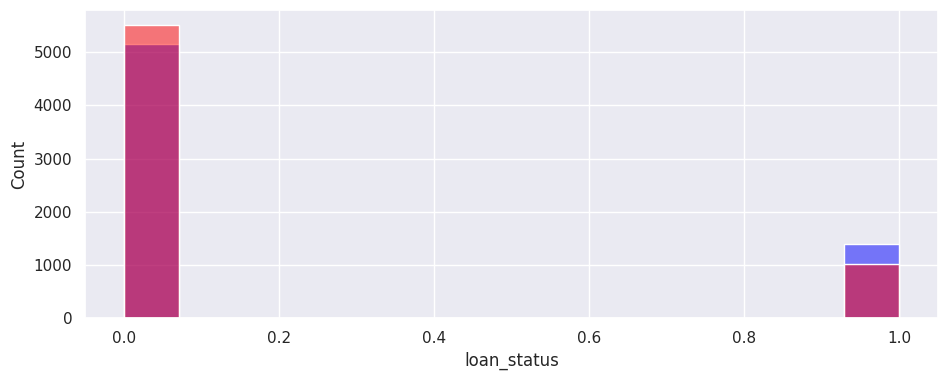

In [ ]:
# Plotting the Graph for KNN classiffier

sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train_transformed,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_test_pred=logistic.predict(X_test_transformed)

In [ ]:
temp_df= pd.DataFrame({'Actual value' : y_test,'Predicted value ' : y_test_pred})
temp_df.head()

,Actual value,Predicted value
10315,0,0
28587,0,0
20380,0,0
12292,1,0
8052,0,0


In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred)

0.8520103959639199

<Axes: xlabel='loan_status', ylabel='Count'>

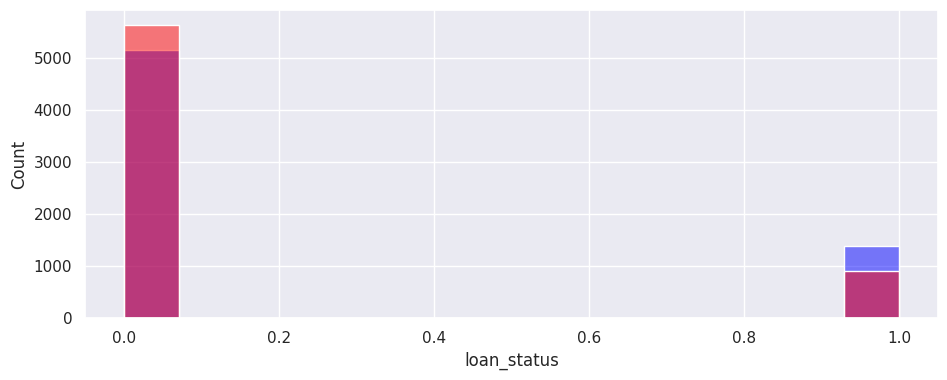

In [ ]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [ ]:
from  sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_transformed,y_train)

SVC()

In [ ]:
y_test_pred = svc.predict(X_test_transformed)

In [ ]:
temp_df= pd.DataFrame({'Actual value' : y_test,'Predicted value ' : y_test_pred})
temp_df.head()

,Actual value,Predicted value
10315,0,0
28587,0,0
20380,0,0
12292,1,1
8052,0,0


In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred)

0.888090506038832

<Axes: xlabel='loan_status', ylabel='Count'>

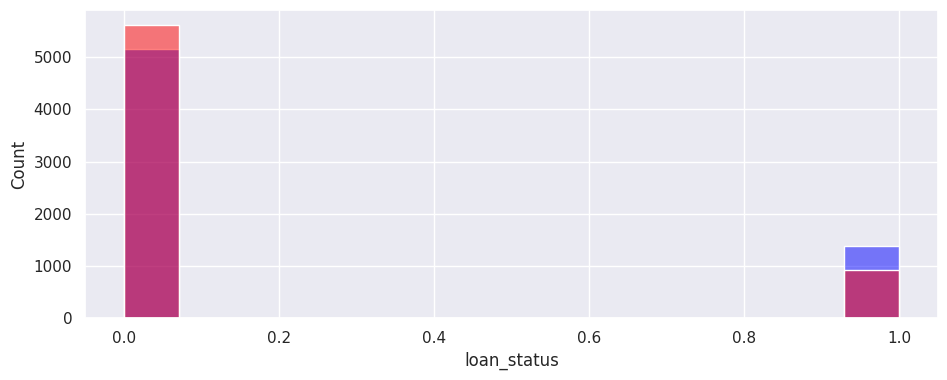

In [ ]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [ ]:
y_test_pred=tree.predict(X_test_transformed)

In [ ]:
temp_df= pd.DataFrame({'Actual value' : y_test,'Predicted value ' : y_test_pred})
temp_df.head()

,Actual value,Predicted value
10315,0,1
28587,0,0
20380,0,1
12292,1,1
8052,0,0


In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred)

0.8897722060846965

<Axes: xlabel='loan_status', ylabel='Count'>

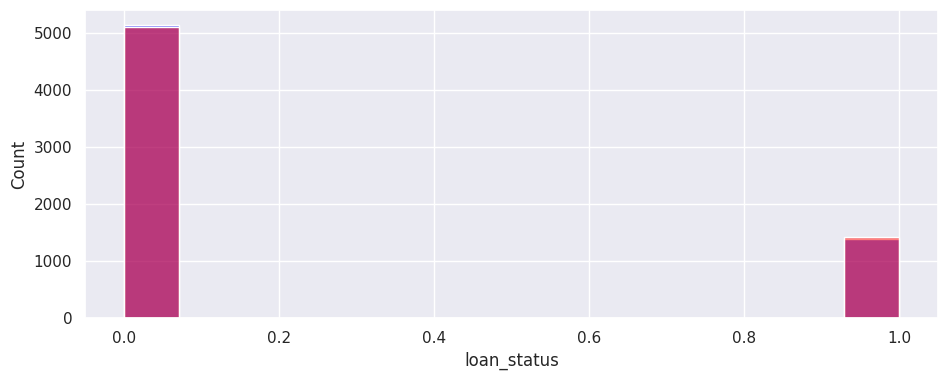

In [ ]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [ ]:
y_test_pred=rfc.predict(X_test_transformed)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred)

0.930744534474851

<Axes: xlabel='loan_status', ylabel='Count'>

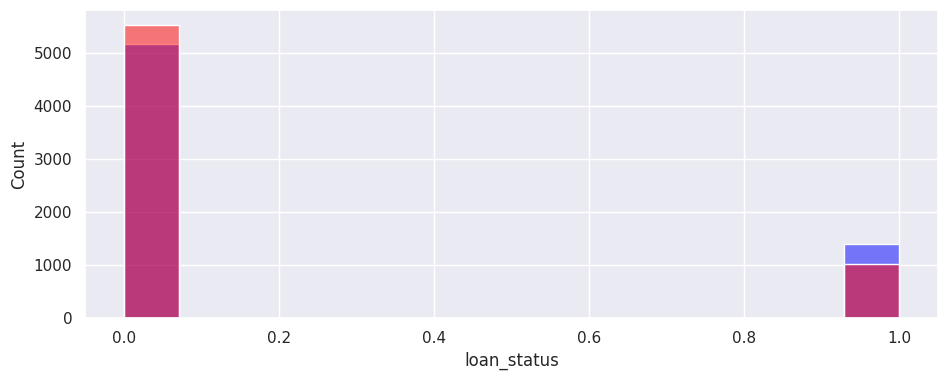

In [ ]:
sns.histplot(y_test,color='blue',alpha=0.5)
sns.histplot(y_test_pred,color='red',alpha=0.5)

## Conculsion

By Training all the model we can conclude the the best model is to predict weather the loan should be approved or not is RandomForest Classifier which is giving 93% accuracy
All the models are giving accuracy above 80% which is good but compare to all the models RandomForest Classifier is the best model to predict the loan approval

​